# Clustering
04027151 Haneul KIM   
04027155 Hayeong LEE

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# 1. Beer Review Dataset

We use Beer Review dataset for our clustering.
We first create the dataset as follows.

In [3]:
data =  pd.read_csv('./data/beer_reviews.csv', header=None, low_memory=False)
data.columns = ['brewery_id', 'brewery_name', 'review_time', 'review_overall',
                'review_aroma', 'review_appearance', 'review_profilename',
               'beer_style', 'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_beerid']

data = data.drop(0)
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])
data.head()

Number of instances = 1586614
Number of attributes = 13


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1,10325,Vecchio Birraio,1234817823,1.5,2,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5,47986
2,10325,Vecchio Birraio,1235915097,3,2.5,3,stcules,English Strong Ale,3,3,Red Moon,6.2,48213
3,10325,Vecchio Birraio,1235916604,3,2.5,3,stcules,Foreign / Export Stout,3,3,Black Horse Black Beer,6.5,48215
4,10325,Vecchio Birraio,1234725145,3,3,3.5,stcules,German Pilsener,2.5,3,Sausa Pils,5,47969
5,1075,Caldera Brewing Company,1293735206,4,4.5,4,johnmichaelsen,American Double / Imperial IPA,4,4.5,Cauldron DIPA,7.7,64883


This dataset has 13 attributes. 
With this dataset, first we will preprocess it.

# 2. Data Preprocessing

Before finding missing values, because all data type is 'string', we need to change the type into 'int' or 'float'.

In [4]:
data['brewery_id'] = data['brewery_id'].astype(int)
data['review_time'] = data['review_time'].astype(int)
data['review_overall'] = data['review_overall'].astype(float)
data['review_aroma'] = data['review_aroma'].astype(float)
data['review_appearance'] = data['review_appearance'].astype(float)
data['review_palate'] = data['review_palate'].astype(float)
data['review_taste'] = data['review_taste'].astype(float)
data['beer_abv'] = data['beer_abv'].astype(float)
data['beer_beerid'] = data['beer_beerid'].astype(int)
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
2,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
3,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
4,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
5,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


## 2.1 Missing Values

In [5]:
print('Number of instances = %d' % data.shape[0])
print('Number of attributes = %d' % data.shape[1])

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Number of instances = 1586614
Number of attributes = 13
Number of missing values:
	brewery_id: 0
	brewery_name: 15
	review_time: 0
	review_overall: 0
	review_aroma: 0
	review_appearance: 0
	review_profilename: 348
	beer_style: 0
	review_palate: 0
	review_taste: 0
	beer_name: 0
	beer_abv: 67785
	beer_beerid: 0


We have missing values in the columns of 'brewery_name', 'review_profilename', and 'beer_abv'.  
In order to know what the missing values are filled with, we will find it by using isnull().

In [6]:
data[data.brewery_name.isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651566,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659294,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659300,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659301,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659302,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659303,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659304,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659306,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391044,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [7]:
data[data.review_profilename.isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
8870,395,Bluegrass Brewing Co. - East St. Matthew's,1205005717,4.0,4.0,3.5,NaN,American Double / Imperial Stout,3.0,3.5,Jefferson's Reserve Bourbon Barrel Stout,8.5,29687
22126,1199,Founders Brewing Company,1231726538,4.0,4.5,4.5,NaN,American Double / Imperial Stout,4.0,4.5,Founders Breakfast Stout,8.3,11757
31823,1199,Founders Brewing Company,1246501387,4.0,4.0,4.0,NaN,American IPA,4.0,4.5,Founders Centennial IPA,7.2,5441
33501,1199,Founders Brewing Company,1238871081,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
33679,1199,Founders Brewing Company,1227224257,5.0,5.0,5.0,NaN,American Double / Imperial Stout,5.0,5.0,Founders KBS (Kentucky Breakfast Stout),11.2,19960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573070,1478,Grand Ridge Brewing Co.,1098619135,3.5,3.0,3.5,NaN,English Pale Ale,3.5,3.0,Grand Ridge Gippsland Gold,4.9,3898
1573135,1478,Grand Ridge Brewing Co.,1099734817,3.5,3.5,4.5,NaN,American Blonde Ale,3.5,3.0,Grand Ridge Yarra Valley Gold,4.9,3903
1573158,1478,Grand Ridge Brewing Co.,1161397360,3.0,3.5,2.0,NaN,Scotch Ale / Wee Heavy,3.0,3.0,Grand Ridge Moonshine,8.5,3900
1580684,429,Alaskan Brewing Co.,1238038506,2.5,3.5,3.0,NaN,Altbier,3.0,2.5,Alaskan Amber,5.3,1309


In [8]:
data[data.beer_abv.isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
274,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
431,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
604,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
734,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
799,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586569,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586588,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586597,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586598,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


All missing values are filled with 'NaN'.  
Since the number of missing values of the columns 'brewery_name' and 'review_profilename' are small and 'string' values, we decided to remove that missing values.  
And the number of the missing values of column 'beer_abs' is big, so we decided to replace it with the median value of that column.

In [9]:
data = data.dropna(subset=['brewery_name'])
data = data.dropna(subset=['review_profilename'])
data = data.fillna(data['beer_abv'].median())
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
2,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
3,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
4,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
5,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586613,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


## 2.2 Outliers
In this sections, we are trying to find out the outliers and remove them.  
First, we need to remove the columns which have 'string' values.

In [10]:
data2 = data.drop(['brewery_name', 'review_profilename', 'beer_style', 'beer_name'], axis=1)
data2

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
1,10325,1234817823,1.5,2.0,2.5,1.5,1.5,5.0,47986
2,10325,1235915097,3.0,2.5,3.0,3.0,3.0,6.2,48213
3,10325,1235916604,3.0,2.5,3.0,3.0,3.0,6.5,48215
4,10325,1234725145,3.0,3.0,3.5,2.5,3.0,5.0,47969
5,1075,1293735206,4.0,4.5,4.0,4.0,4.5,7.7,64883
...,...,...,...,...,...,...,...,...,...
1586610,14359,1162684892,5.0,4.0,3.5,4.0,4.0,5.2,33061
1586611,14359,1161048566,4.0,5.0,2.5,2.0,4.0,5.2,33061
1586612,14359,1160702513,4.5,3.5,3.0,3.5,4.0,5.2,33061
1586613,14359,1160023044,4.0,4.5,4.5,4.5,4.5,5.2,33061


And then, to find out the outliers, we draw a boxplot for the data.

<AxesSubplot:>

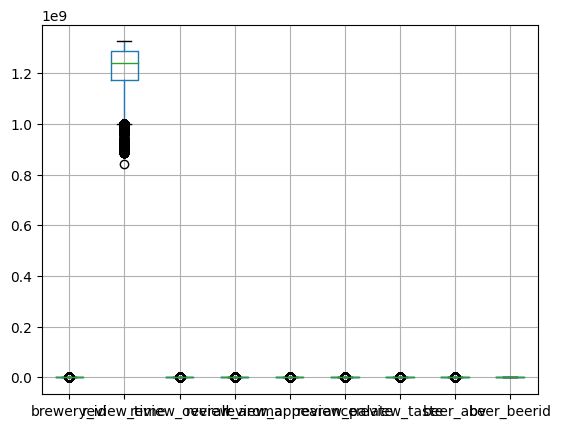

In [11]:
data2.boxplot()

Except beer_beerid, all columns have outliers.  
To remove the outliers, we compute Z-score and remain attributes containing Z-score between -3 and 3.  

In [12]:
# Z-score
z = (data2-data2.mean())/data2.std()
z.columns = ['z_brewery_id', 'z_review_time', 'z_review_overall', 'z_review_aroma', 'z_review_appearance',
            'z_review_palate', 'z_review_taste', 'z_beear_abv', 'z_beer_beerid']
z

,z_brewery_id,z_review_time,z_review_overall,z_review_aroma,z_review_appearance,z_review_palate,z_review_taste,z_beear_abv,z_beer_beerid
1,1.289710,0.140024,-3.213513,-2.488210,-2.177827,-3.289146,-3.132803,-0.887587,1.204057
2,1.289710,0.154359,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.360127,1.214461
3,1.289710,0.154379,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.228263,1.214552
4,1.289710,0.138813,-1.131891,-1.054651,-0.554614,-1.823236,-1.083366,-0.887587,1.203278
5,-0.368448,0.909742,0.255857,1.095686,0.256992,0.375629,0.966071,0.299197,1.978473
...,...,...,...,...,...,...,...,...,...
1586610,2.012846,-0.802347,1.643605,0.378907,-0.554614,0.375629,0.282925,-0.799677,0.520020
1586611,2.012846,-0.823724,0.255857,1.812465,-2.177827,-2.556191,0.282925,-0.799677,0.520020
1586612,2.012846,-0.828245,0.949731,-0.337872,-1.366221,-0.357326,0.282925,-0.799677,0.520020
1586613,2.012846,-0.837122,0.255857,1.095686,1.068599,1.108585,0.966071,-0.799677,0.520020


In [13]:
data = pd.concat([data, z], axis = 1)
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,beer_beerid,z_brewery_id,z_review_time,z_review_overall,z_review_aroma,z_review_appearance,z_review_palate,z_review_taste,z_beear_abv,z_beer_beerid
1,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,...,47986,1.289710,0.140024,-3.213513,-2.488210,-2.177827,-3.289146,-3.132803,-0.887587,1.204057
2,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,...,48213,1.289710,0.154359,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.360127,1.214461
3,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,...,48215,1.289710,0.154379,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.228263,1.214552
4,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,...,47969,1.289710,0.138813,-1.131891,-1.054651,-0.554614,-1.823236,-1.083366,-0.887587,1.203278
5,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,...,64883,-0.368448,0.909742,0.255857,1.095686,0.256992,0.375629,0.966071,0.299197,1.978473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,...,33061,2.012846,-0.802347,1.643605,0.378907,-0.554614,0.375629,0.282925,-0.799677,0.520020
1586611,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,...,33061,2.012846,-0.823724,0.255857,1.812465,-2.177827,-2.556191,0.282925,-0.799677,0.520020
1586612,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,...,33061,2.012846,-0.828245,0.949731,-0.337872,-1.366221,-0.357326,0.282925,-0.799677,0.520020
1586613,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,...,33061,2.012846,-0.837122,0.255857,1.095686,1.068599,1.108585,0.966071,-0.799677,0.520020


In [14]:
data = data[data['z_brewery_id'].between(-3, 3)]
data = data[data['z_review_time'].between(-3, 3)]
data = data[data['z_review_overall'].between(-3, 3)]
data = data[data['z_review_aroma'].between(-3, 3)]
data = data[data['z_review_appearance'].between(-3, 3)]
data = data[data['z_review_palate'].between(-3, 3)]
data = data[data['z_review_taste'].between(-3, 3)]
data = data[data['z_beear_abv'].between(-3, 3)]
data = data[data['z_beer_beerid'].between(-3, 3)]

data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,...,beer_beerid,z_brewery_id,z_review_time,z_review_overall,z_review_aroma,z_review_appearance,z_review_palate,z_review_taste,z_beear_abv,z_beer_beerid
2,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,...,48213,1.289710,0.154359,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.360127,1.214461
3,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,...,48215,1.289710,0.154379,-1.131891,-1.771430,-1.366221,-1.090281,-1.083366,-0.228263,1.214552
4,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,...,47969,1.289710,0.138813,-1.131891,-1.054651,-0.554614,-1.823236,-1.083366,-0.887587,1.203278
5,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,...,64883,-0.368448,0.909742,0.255857,1.095686,0.256992,0.375629,0.966071,0.299197,1.978473
6,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,...,52159,-0.368448,1.325050,-1.131891,-0.337872,-0.554614,-1.090281,-0.400221,-1.019451,1.395312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586610,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,...,33061,2.012846,-0.802347,1.643605,0.378907,-0.554614,0.375629,0.282925,-0.799677,0.520020
1586611,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,...,33061,2.012846,-0.823724,0.255857,1.812465,-2.177827,-2.556191,0.282925,-0.799677,0.520020
1586612,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,...,33061,2.012846,-0.828245,0.949731,-0.337872,-1.366221,-0.357326,0.282925,-0.799677,0.520020
1586613,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,...,33061,2.012846,-0.837122,0.255857,1.095686,1.068599,1.108585,0.966071,-0.799677,0.520020


## 2.3 Duplicate Data

In [15]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


Since there is no duplicate rows, we skip the step of removing duplicate data

## 2.4 Data Aggregation

Since one brewery has multiple review data, we will group by brewery_name to see what the review data for each brewery is like.

In [16]:
data = data[['brewery_id', 'brewery_name', 'review_overall', 'review_aroma',
            'review_appearance', 'review_palate', 'review_taste']]

agg_data = data.groupby('brewery_name', as_index=False).mean()
agg_data

,brewery_name,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,'t Hofbrouwerijke,13160.0,3.750000,3.805556,3.888889,3.597222,3.638889
1,(512) Brewing Company,17863.0,4.074257,4.008251,4.061056,3.966997,4.059406
2,10 Barrel Brewing Co.,16873.0,3.753012,3.578313,3.849398,3.638554,3.656627
3,1516 Brewing Company,4473.0,4.132353,3.911765,4.191176,3.897059,4.073529
4,1648 Brewing Company Ltd,8396.0,3.500000,4.000000,3.500000,3.500000,4.000000
...,...,...,...,...,...,...,...
4611,Ölvisholt Brugghús,17208.0,3.937500,3.880208,3.875000,3.843750,3.895833
4612,Öufi Brauerei,18851.0,3.500000,4.000000,4.500000,3.500000,3.500000
4613,Ølfabrikken,11063.0,4.084906,4.155232,4.188679,4.152659,4.211835
4614,Ørbæk Bryggeri,15051.0,3.583333,3.555556,3.583333,3.638889,3.722222


## 2.5 Sampling

we will do sampling to facilitate using data.  
We select randomly 5% of original data and the sampling method is without replacement.

In [17]:
sample_data = agg_data.sample(frac=0.05)
sample_data

,brewery_name,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste
313,Belfast Bay Brewing Co.,400.0,3.774112,3.565990,3.819797,3.604061,3.728426
3569,River Market Brewing Company,2145.0,3.562500,3.250000,3.625000,3.375000,3.187500
1244,Cascade Brewery Company Ltd.,1595.0,3.198718,3.035256,3.314103,3.041667,3.076923
891,Brauerei Tucher Brau,129.0,3.988848,3.758364,3.947955,3.817224,3.849442
827,Brauerei Johann Kneitinger,5913.0,3.750000,3.400000,3.700000,3.750000,3.550000
...,...,...,...,...,...,...,...
4090,The Black Turtle Pub I,19528.0,3.333333,3.500000,3.833333,2.500000,2.833333
3064,Norilskiy Pivovarinniy Zavod,9188.0,2.500000,2.500000,3.500000,3.000000,3.000000
1536,Denison's Brewing Company & Restaurant,662.0,4.055556,4.222222,4.166667,3.833333,4.166667
3446,Privatbrauerei Kesselring Gmbh & Co. KG,8912.0,3.571429,3.571429,3.571429,3.357143,3.428571


# 3. Clustering

## 3.1 K-Means Clustering

In this sections, we apply k-means clustering to our dataset.

In [18]:
brewery_name = sample_data[['brewery_name']]
km_data = sample_data[['review_overall', 'review_aroma',
                    'review_appearance', 'review_palate', 'review_taste']]
km_data

,review_overall,review_aroma,review_appearance,review_palate,review_taste
313,3.774112,3.565990,3.819797,3.604061,3.728426
3569,3.562500,3.250000,3.625000,3.375000,3.187500
1244,3.198718,3.035256,3.314103,3.041667,3.076923
891,3.988848,3.758364,3.947955,3.817224,3.849442
827,3.750000,3.400000,3.700000,3.750000,3.550000
...,...,...,...,...,...
4090,3.333333,3.500000,3.833333,2.500000,2.833333
3064,2.500000,2.500000,3.500000,3.000000,3.000000
1536,4.055556,4.222222,4.166667,3.833333,4.166667
3446,3.571429,3.571429,3.571429,3.357143,3.428571


To determine the number of clusters, we use the Elbow method.   
We apply k-means with the different number of clusters from 1 to 6, and compute Sum-of-Squared Errors (SSE). 

Text(0, 0.5, 'SSE')

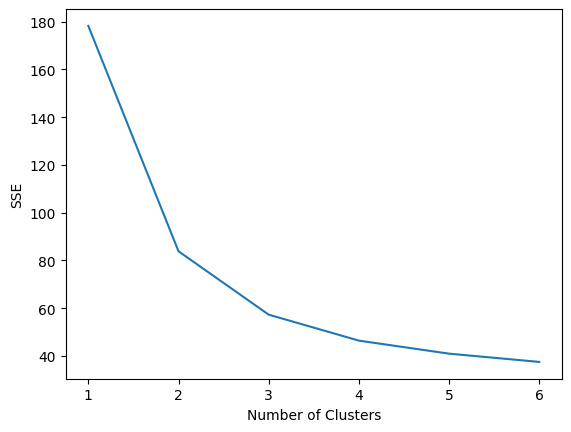

In [19]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(km_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

As shown in the plots, the SSE values are changed slowly from 3, we chose to cluster with k = 3.
With k=3, we generate k-means model and traing the model.

In [20]:
k = 3
#create the model
k_means = cluster.KMeans(n_clusters=k, max_iter=50, random_state=1)
#train the model
k_means.fit(km_data)

labels = k_means.labels_
centroids = k_means.cluster_centers_
centroids

array([[3.11520287, 2.96516589, 3.20605183, 2.98096953, 3.01496709],
       [4.02876521, 3.90813119, 3.97982536, 3.92215253, 3.95219568],
       [3.61389154, 3.49239288, 3.62034952, 3.5235409 , 3.53595073]])

After training the model, we predict the new sample test data.

In [21]:
km_test_sample_data = agg_data.sample(frac=0.05)

km_test_brewery_name = km_test_sample_data[['brewery_name']]
km_test_data = km_test_sample_data[['review_overall', 'review_aroma',
                    'review_appearance', 'review_palate', 'review_taste']]

predict = pd.DataFrame(k_means.predict(km_test_data))
predict.columns = ['Cluster']
predict

,Cluster
0,0
1,2
2,2
3,2
4,0
...,...
226,2
227,0
228,1
229,0


In [22]:
result = pd.concat([km_test_data, km_test_brewery_name], axis=1).reset_index(drop=True)
result = pd.concat([result, predict], axis=1).reset_index(drop=True)
result

,review_overall,review_aroma,review_appearance,review_palate,review_taste,brewery_name,Cluster
0,3.301205,3.280120,3.349398,3.186747,3.222892,Estes Park Brewery,0
1,4.000000,3.000000,3.500000,3.500000,3.500000,Brauerei Thomas Ametsbichler,2
2,3.500000,3.656250,3.562500,3.468750,3.375000,The Brewerie At Union Station,2
3,3.478261,3.456522,3.440217,3.293478,3.277174,Otway Estate Winery & Brewery,2
4,3.000000,3.250000,3.250000,2.500000,3.250000,Manchester Bar & Grill,0
...,...,...,...,...,...,...,...
226,3.250000,3.500000,3.750000,3.250000,3.000000,Brouwerij Het Levenswater,2
227,2.928571,3.107143,3.178571,3.178571,2.928571,Sarmat,0
228,4.020270,3.915541,3.939189,3.888514,3.952703,Right Brain Brewery,1
229,2.875000,2.812500,2.750000,2.875000,2.750000,Irkutskpisheprom,0


Text(0.5, 1.0, 'Review_palate & Review_taste')

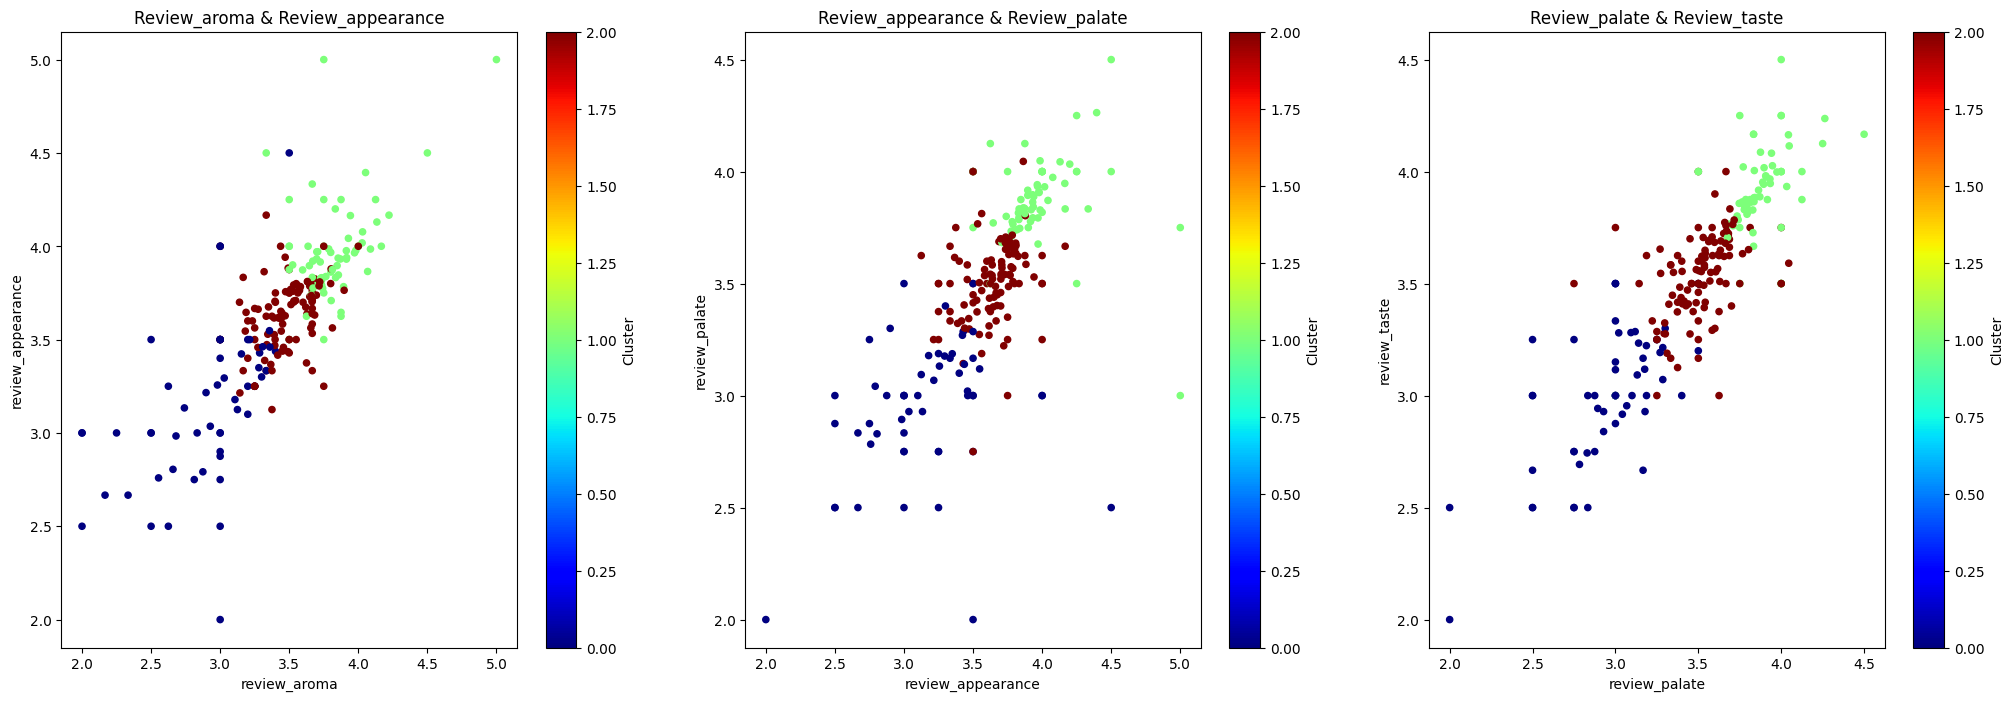

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

result.plot.scatter(x='review_aroma', y='review_appearance', c='Cluster', colormap='jet', ax=ax1)
ax1.set_title('Review_aroma & Review_appearance')

result.plot.scatter(x='review_appearance', y='review_palate', c='Cluster', colormap='jet', ax=ax2)
ax2.set_title('Review_appearance & Review_palate')

result.plot.scatter(x='review_palate', y='review_taste', c='Cluster', colormap='jet', ax=ax3)
ax3.set_title('Review_palate & Review_taste')

In [44]:
from sklearn.metrics import silhouette_score
 
km_score = silhouette_score(km_test_data, predict, metric='euclidean')
print("Silhouette score: ", km_score)

Silhouette score:  0.3375674719105835


/home/lha0/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



We tried to see 3 clusterings, which are 'review_aroma' and 'review_appearance', 'review_appearance' and 'review_palate', and 'review_palate' and 'review_taste'.  
In the results,  It seems to be well seperated into three clusters.   
But, many outliers are seen even after removing outliers. And the clusters appear to overlap with each other in the results.  
Also, the silhouette score is very low.

# 3.2 Hierarchical Clustering

In this section, we try to do hierarchical clustering with different link methods.

## 3.2.1 Single Link (MIN)

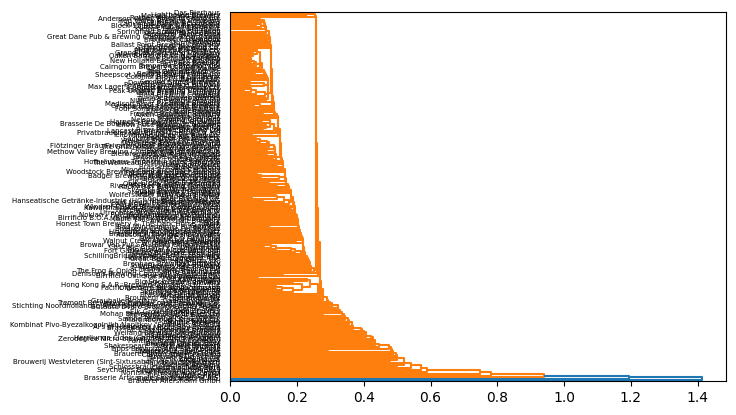

In [40]:
names = sample_data['brewery_name']
Z = hierarchy.linkage(km_data, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 3.2.2 Complete Link (MAX)

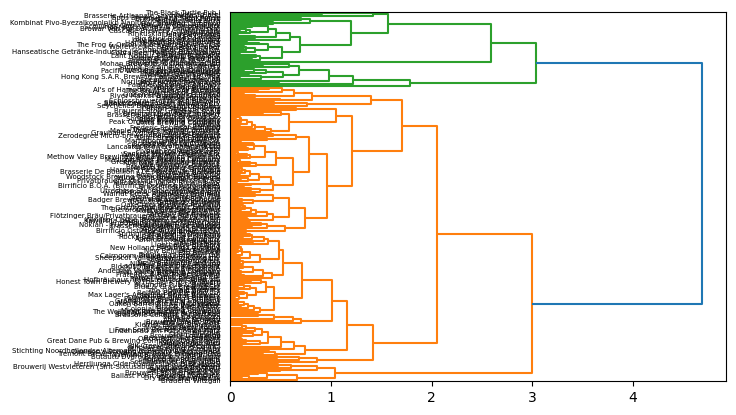

In [27]:
Z = hierarchy.linkage(km_data, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 3.2.3 Group Average

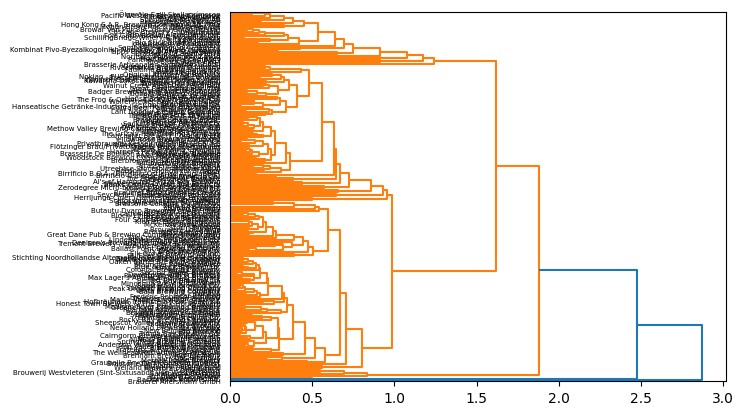

In [28]:
Z = hierarchy.linkage(km_data, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 3.2.4 Centroids

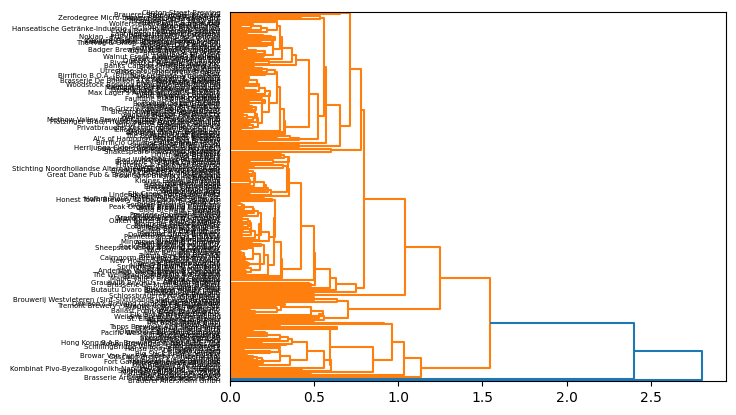

In [29]:
Z = hierarchy.linkage(km_data, 'centroid')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

It seems that the cluster analysis did not work well.    
In the case of single link and group average link, all data seems to be formed as one cluster rather than multiple clusters.  
The complete link and centroids link seem to have formed three clusters, but still a lot of data is biased in one cluster.

# 3.3 Density-Based Clustering

In this sections, we try to do Density-Based Clustering, especially DBSCAN.  

To use DBSCAN, we need to set two hyperparameters, eps and minpts.
For minpts, we use k=4. And to set eps hyperparameter, we use Elbow method.

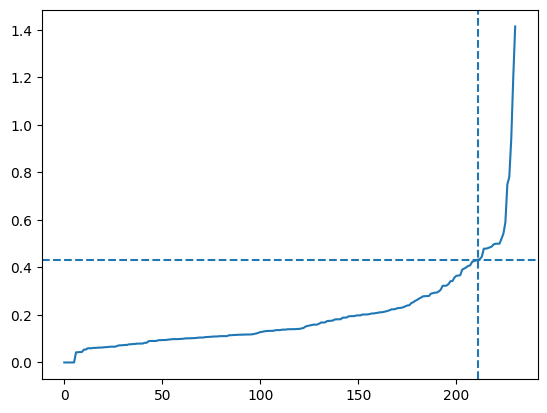

In [30]:
DB_data = sample_data[['review_overall', 'review_aroma',
                    'review_appearance', 'review_palate', 'review_taste']]

neighbors = NearestNeighbors(n_neighbors = 4)
neighbors_fit = neighbors.fit(DB_data)
distances, indices = neighbors_fit.kneighbors(DB_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

plt.axvline(211, 0, 2, ls='--')
plt.axhline(0.43, 0, 200, ls='--')

We find the radius by calculating the distance between the data points in a cluster and the kth neighboring data points.  
And as in the plot, there is rapid change at the point (211, 0.43).
So, we set the eps as 0.43

<AxesSubplot:xlabel='review_palate', ylabel='review_taste'>

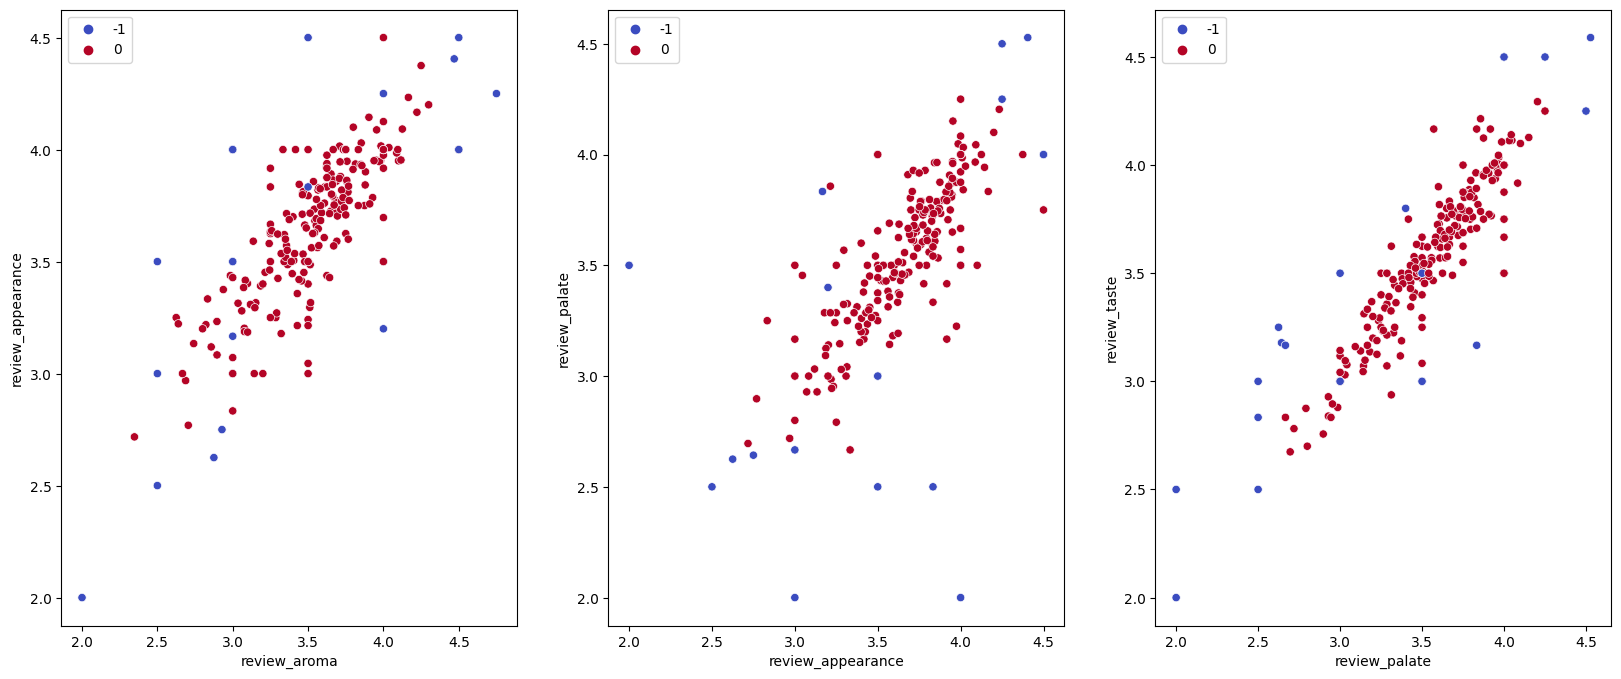

In [31]:
dbscan = DBSCAN(eps=0.43, min_samples=4)
dbscan.fit(DB_data)

db_labels = dbscan.labels_

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

sns.scatterplot(x='review_aroma', y='review_appearance', data=DB_data, hue=db_labels, palette='coolwarm', ax=ax1)
sns.scatterplot(x='review_appearance', y='review_palate', data=DB_data, hue=db_labels, palette='coolwarm', ax=ax2)
sns.scatterplot(x='review_palate', y='review_taste', data=DB_data, hue=db_labels, palette='coolwarm', ax=ax3)

In [43]:
from sklearn.metrics import silhouette_score
 
db_score = silhouette_score(DB_data, db_labels, metric='euclidean')
print("Silhouette score: ", db_score)

Silhouette score:  0.37988206387744944


The all data except for outliers included in one cluster. 
We think the result is because the data are all attached and gathered. So, It seems that the model recognized it as one cluster.  
Also, the silhouette score is also low.